In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import regex as re

In [2]:
df = pd.read_csv('haberman.csv')
df.head()

,Age,Year of Operation,No. of Positive Auxilary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

In [4]:
df['Age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

In [5]:
df['No. of Positive Auxilary nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: No. of Positive Auxilary nodes, dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             289 non-null    int64
 1   Year of Operation               289 non-null    int64
 2   No. of Positive Auxilary nodes  289 non-null    int64
 3   Survival Status                 289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


In [8]:
X = df.drop(columns='Survival Status')
y=df['Survival Status']
X.shape, y.shape

((289, 3), (289,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,stratify=y)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((231, 3), (58, 3), (231,), (58,))

In [33]:
y_train.value_counts()

1    168
2     63
Name: Survival Status, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_tr_std = scaler.transform(X_train)
X_tst_std = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=42)
clf.fit(X_tr_std, y_train)
predict = clf.predict(X_tst_std)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        42
           2       0.00      0.00      0.00        16

    accuracy                           0.72        58
   macro avg       0.36      0.50      0.42        58
weighted avg       0.52      0.72      0.61        58



c:\Users\PRASAD\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRASAD\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRASAD\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[42,  0],
       [16,  0]], dtype=int64)

<AxesSubplot:>

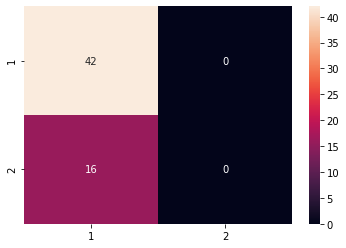

In [18]:
sns.heatmap(confusion_matrix(y_test, predict,labels=[1,2]),annot=True,xticklabels=[1,2],yticklabels=[1,2])

In [19]:
clf = LogisticRegression(class_weight='balanced',random_state=42)
clf.fit(X_tr_std, y_train)
predict = clf.predict(X_tst_std)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.79      0.88      0.83        42
           2       0.55      0.38      0.44        16

    accuracy                           0.74        58
   macro avg       0.67      0.63      0.64        58
weighted avg       0.72      0.74      0.72        58



<AxesSubplot:>

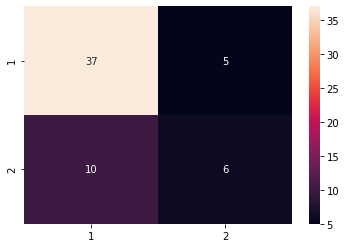

In [20]:
sns.heatmap(confusion_matrix(y_test, predict,labels=[1,2]),annot=True,xticklabels=[1,2],yticklabels=[1,2])

In [21]:
X_tr_std.shape, y_train.shape

((231, 3), (231,))

In [22]:
y_train.value_counts()

1    168
2     63
Name: Survival Status, dtype: int64

In [24]:
!pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_res,y_res = ros.fit_resample(X_tr_std,y_train)
X_res.shape, y_res.shape

((336, 3), (336,))

In [28]:
y_res.value_counts()

2    168
1    168
Name: Survival Status, dtype: int64

In [29]:
clf = LogisticRegression(random_state=42)
clf.fit(X_res, y_res)
predict = clf.predict(X_tst_std)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84        42
           2       0.60      0.38      0.46        16

    accuracy                           0.76        58
   macro avg       0.70      0.64      0.65        58
weighted avg       0.74      0.76      0.74        58



In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_res,y_res = rus.fit_resample(X_tr_std,y_train)
X_res.shape, y_res.shape

((126, 3), (126,))

In [31]:
y_res.value_counts()

2    63
1    63
Name: Survival Status, dtype: int64

In [32]:
clf = LogisticRegression(random_state=42)
clf.fit(X_res, y_res)
predict = clf.predict(X_tst_std)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.76      0.67      0.71        42
           2       0.33      0.44      0.38        16

    accuracy                           0.60        58
   macro avg       0.55      0.55      0.54        58
weighted avg       0.64      0.60      0.62        58

